In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

In [3]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
#plt.style.use('seaborn')

Olá **Cientista**!

Bem vinda e bem vindo ao **mega desafio do Módulo 01**, neste desafio queremos que você aplique tudo que aprendeu no curso, analisando uma outra informação ~~referente a base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade.~~ 

**P.S: Infelizmente o DataSUS está fora do ar por tempo indeterminado, para você não parar seu projeto, adicionamos no [GitHub](https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados) do curso, duas novas bases para você utilizar neste projeto (COVID-19 e Óbitos).**

Uma base é dos **casos de COVID-19 baixadas do projeto [BRASIL.IO](https://brasil.io/dataset/covid19/caso/)**, outra são os números de óbitos registrados no cartório civil desde 1970 retirado do **[Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)**.

Vocês podem escolher qualquer uma das duas bases de dados, a de COVID-19 é mais desafiadora e você vai precisar descompactar o arquivo por ser grande e entrar no site do Brasil.IO para entender todas as features presentes (No Brasil.IO tem diversas bases sobre COVID-19, estamos usando a chamada **Casos**). A base de óbito é mais simples e relativamente semelhate a utilizada no curso.

Algumas dicas para você mandar bem no desafio final, capriche nas análises, escreva suas conclusões e hipóteses (mesmo que resultado seja inconclusivo) e não esqueça de colocar um resumo dos pontos que julgar mais interessantes do seu projeto.



E para que o seu projeto tenha a oportunidade de ser avalido pelo Thiago G. Santos e Átila Iamarino, ao vivo na **live de revisão de projetos** submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.

Para facilitar a vida dos seus instrutores favoritos, no momento da correção, algumas dicas de como estruturar seu projeto:

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)

Qualquer dúvida não deixe de perguntar no Discord, compatilhe seu projeto nas redes sociais e crie um repositório no github, esse é o início do seu portifólio em Data Science.



Fique a vontade para utilizar esse notebook como template projeto.



## Resumo:

Faça aqui o resumo das suas analises, destacando os pontos principais do seu projeto

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

In [4]:
covid = pd.read_csv("caso.csv"
                      ,encoding='UTF-8',sep=',')

In [5]:
covid.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,AC,NaN,state,31248,697,234,True,881935.00,894470.00,12.00,3493.47,0.02
1,2020-11-04,AC,NaN,state,31218,696,233,False,881935.00,894470.00,12.00,3490.11,0.02
2,2020-11-03,AC,NaN,state,30962,695,232,False,881935.00,894470.00,12.00,3461.49,0.02
3,2020-11-02,AC,NaN,state,30954,693,231,False,881935.00,894470.00,12.00,3460.60,0.02
4,2020-11-01,AC,NaN,state,30951,693,230,False,881935.00,894470.00,12.00,3460.26,0.02


In [6]:
covid['date'] = pd.to_datetime(covid['date'])

In [7]:
covid['day'] = covid['date'].dt.day

In [8]:
covid['month'] = covid['date'].dt.month

In [9]:
covid['year'] = covid['date'].dt.year

In [10]:
columns = ['date','day','month','year','state','city','place_type','confirmed','deaths','order_for_place','is_last','estimated_population_2019','estimated_population','city_ibge_code','confirmed_per_100k_inhabitants','death_rate']

In [11]:
covid = covid[columns]

In [12]:
covid.place_type.unique()

array(['state', 'city'], dtype=object)

In [13]:
covid_city = covid[covid['place_type'] == 'city']
covid_state = covid[covid['place_type'] == 'state']

In [14]:
df = covid_state.copy()

In [15]:
df.drop(columns=['place_type','order_for_place','city'],inplace=True)

In [16]:
#sp = df[df['state'] == 'SP']
new_df = df.copy()

In [17]:
df[df['state'] == 'AC'].head()

,date,day,month,year,state,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-05,5,11,2020,AC,31248,697,True,881935.00,894470.00,12.00,3493.47,0.02
1,2020-11-04,4,11,2020,AC,31218,696,False,881935.00,894470.00,12.00,3490.11,0.02
2,2020-11-03,3,11,2020,AC,30962,695,False,881935.00,894470.00,12.00,3461.49,0.02
3,2020-11-02,2,11,2020,AC,30954,693,False,881935.00,894470.00,12.00,3460.60,0.02
4,2020-11-01,1,11,2020,AC,30951,693,False,881935.00,894470.00,12.00,3460.26,0.02


# Ultima postagem Ratio de Mortes por Estado

In [18]:
new_df = new_df[new_df['is_last'] == True].sort_values(by='death_rate')

In [19]:
new_df[new_df['month'] == 11].head()

,date,day,month,year,state,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
668623,2020-11-05,5,11,2020,SC,268644,3173,True,7164788.00,7252502.00,42.00,3704.16,0.01
651937,2020-11-04,4,11,2020,RR,58304,695,True,605761.00,631181.00,14.00,9237.29,0.01
4247,2020-11-03,3,11,2020,AP,52832,751,True,845731.00,861773.00,16.00,6130.62,0.01
802533,2020-11-04,4,11,2020,TO,76175,1108,True,1572866.00,1590248.00,17.00,4790.13,0.01
38885,2020-11-05,5,11,2020,DF,214955,3728,True,3015268.00,3055149.00,53.00,7035.83,0.02


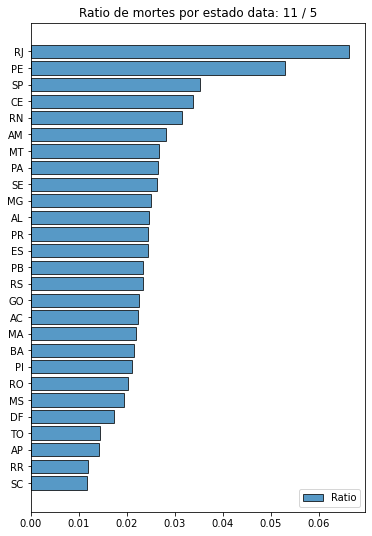

In [20]:
plt.figure(figsize=(6,9))
plt.barh(new_df['state'],new_df['death_rate'],label='Ratio'
         ,edgecolor='black',linewidth=1,alpha=0.75)
plt.legend()
plt.title(f'Ratio de mortes por estado data: {new_df.date.dt.month.max()} / {new_df.date.dt.day.max()}')
plt.show()

# Tendência Evolutiva SP

In [21]:
sp = df[df['state'] == 'SP'].copy()

In [22]:
sp.head()

,date,day,month,year,state,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
821973,2020-11-05,5,11,2020,SP,1125936,39717,True,45919049.00,46289333.00,35.00,2432.39,0.04
821974,2020-11-04,4,11,2020,SP,1123299,39549,False,45919049.00,46289333.00,35.00,2426.69,0.04
821975,2020-11-03,3,11,2020,SP,1118544,39364,False,45919049.00,46289333.00,35.00,2416.42,0.04
821976,2020-11-02,2,11,2020,SP,1117795,39346,False,45919049.00,46289333.00,35.00,2414.80,0.04
821977,2020-11-01,1,11,2020,SP,1117147,39331,False,45919049.00,46289333.00,35.00,2413.40,0.04


In [23]:
sp_grouped = sp.groupby('month').max()

In [24]:
sp_grouped.tail()

,date,day,year,state,confirmed,deaths,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
month,,,,,,,,,,,,
7,2020-07-31,31,2020,SP,542304,22997,False,45919049.00,46289333.00,35.00,1171.55,0.05
8,2020-08-31,31,2020,SP,804342,30014,False,45919049.00,46289333.00,35.00,1737.64,0.04
9,2020-09-30,30,2020,SP,985628,35622,False,45919049.00,46289333.00,35.00,2129.28,0.04
10,2020-10-31,31,2020,SP,1116127,39311,False,45919049.00,46289333.00,35.00,2411.20,0.04
11,2020-11-05,5,2020,SP,1125936,39717,True,45919049.00,46289333.00,35.00,2432.39,0.04


### Casos por 100k habitantes

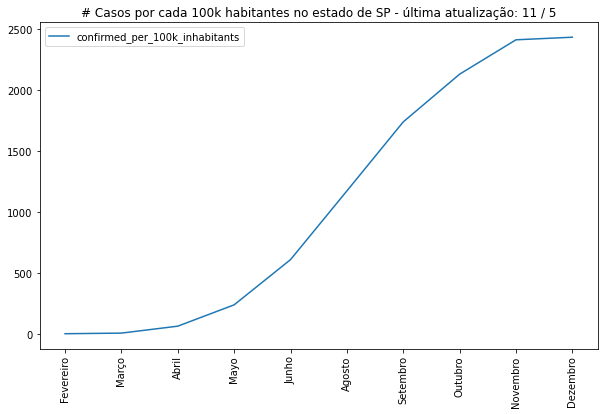

In [31]:
xlabels = ['Fevereiro','Março','Abril','Mayo','Junho','Agosto','Setembro','Outubro','Novembro','Dezembro']

plt.figure(figsize=(10,6))

plt.plot(sp_grouped['confirmed_per_100k_inhabitants'],label='confirmed_per_100k_inhabitants')
plt.xticks(sp_grouped.index,xlabels,rotation=90)
plt.legend()
plt.title(f'# Casos por cada 100k habitantes no estado de SP - última atualização: {new_df.date.dt.month.max()} / {new_df.date.dt.day.max()}')
plt.show()

### Mortes

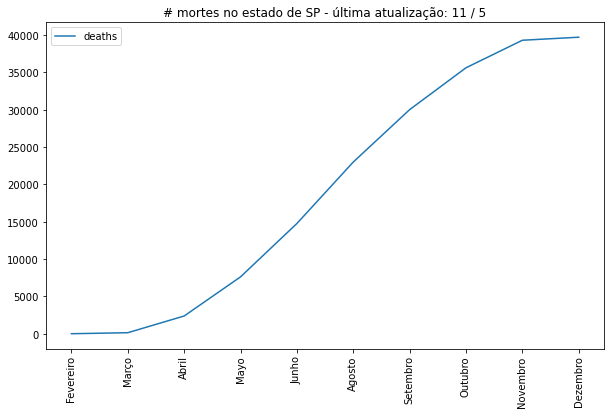

In [25]:
plt.figure(figsize=(10,6))

plt.plot(sp_grouped['deaths'],label='deaths')
plt.xticks(sp_grouped.index,xlabels,rotation=90)
plt.legend()
plt.title(f'# mortes no estado de SP - última atualização: {new_df.date.dt.month.max()} / {new_df.date.dt.day.max()}')
plt.show()

### Comparando SP e RJ

In [26]:
rj = df[df['state'] == 'RJ'].copy()

In [27]:
rj_grouped = rj.groupby('month').max()

### Casos por cada 100k Habitantes

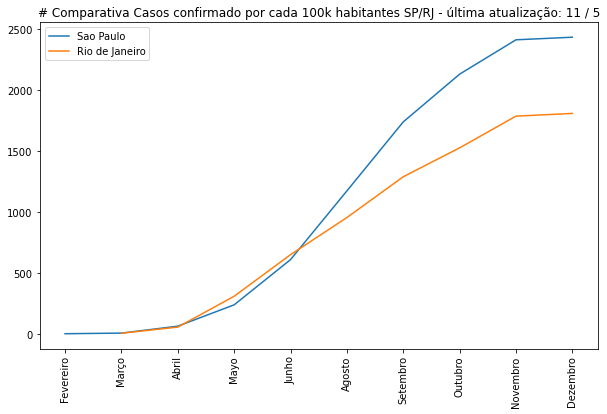

In [33]:
plt.figure(figsize=(10,6))

plt.plot(sp_grouped['confirmed_per_100k_inhabitants'],label='Sao Paulo')
plt.plot(rj_grouped['confirmed_per_100k_inhabitants'],label='Rio de Janeiro')
plt.plot
plt.xticks(sp_grouped.index,xlabels,rotation=90)
plt.legend()
plt.title(f'# Comparativa Casos confirmado por cada 100k habitantes SP/RJ - última atualização: {new_df.date.dt.month.max()} / {new_df.date.dt.day.max()}')
plt.show()

### Mortes

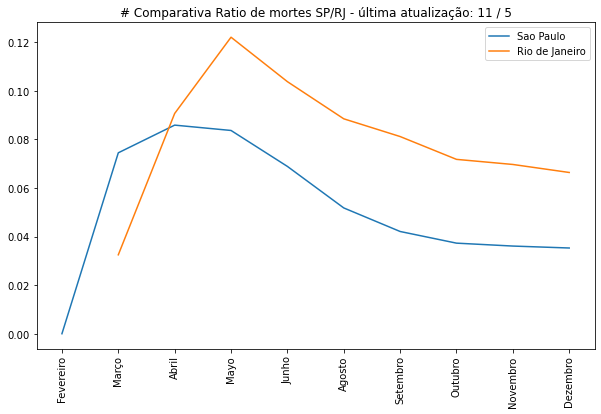

In [34]:
plt.figure(figsize=(10,6))

plt.plot(sp_grouped['death_rate'],label='Sao Paulo')
plt.plot(rj_grouped['death_rate'],label='Rio de Janeiro')
plt.plot
plt.xticks(sp_grouped.index,xlabels,rotation=90)
plt.legend()
plt.title(f'# Comparativa Ratio de mortes SP/RJ - última atualização: {new_df.date.dt.month.max()} / {new_df.date.dt.day.max()}')
plt.show()